In [ ]:
import time
import numpy as np
import pandas as pd

In [ ]:
sample_sizes = [100, 620, 1140,  1660,  2180,  2700,  3220,  3740, 4260, 4780, 5310,  5830,  6350,  6870,  7390,  7910,  8440,  8960, 9480, 10000]

# 1. Модифицировать два метода генерации псевдослучайных чисел

## Модифицированный линейный конгруэнтный метод

In [ ]:
def modified_lcg(seed=None, m=2**31 - 1, a0=1220703125, c0=7, size=1):
    if seed is None:
        seed = int(time.time()) % 10
    sample = []
    for i in range(size):
        x = sample[i - 1] if i > 0 else seed
        a = a0 + (i % 10)
        c = c0 + (x % 10)
        sample.append((a * x + c) % m)
    return sample[0] if size == 1 else sample

# Модифицированное еще что-то там

In [ ]:
def blum_blum_shub(seed=None, bits=13, size=1):
    p = 357079
    q = 906403
    m = p * q
    if seed is None:
        seed = int(time.time())
    x = []
    for n in range(size):
        xn = seed if n == 0 else x[n - 1]
        xn = xn ** 2 % m
        output = 0
        for _ in range(bits):
            output = (output << 1) | (xn & 1) # Получение младшего бита
            xn = xn ** 2 % m
        x.append(output)

    return x[0] if size == 1 else x

# 2. Получить не менее 20 выборок каждым методом (диапазон чисел в каждой выборке не менее 5000) объемом не менее 100 элементов каждая

In [ ]:
mylcg_samples = []
bbs_samples = []

for size in sample_sizes:
    mylcg_samples.append(modified_lcg(size=size))
    bbs_samples.append(blum_blum_shub(size=size))

# 3. Подсчет статистик

## Среднее

In [ ]:
bbs_mean = [np.mean(sample) for sample in bbs_samples]
bbs_mean

[4194.79,
 4238.6467741935485,
 4244.9850877192985,
 4248.813855421687,
 4253.439908256881,
 4248.990740740741,
 4248.98850931677,
 4249.656684491979,
 4249.047417840376,
 4251.851882845188,
 3633.432768361582,
 3632.9370497427103,
 3632.5225196850392,
 3632.1707423580788,
 3631.8684709066306,
 3631.605941845765,
 3631.4708530805688,
 3631.2621651785716,
 3631.076371308017,
 3630.9099]

In [ ]:
lcg_mean = [np.mean(sample) for sample in mylcg_samples]
lcg_mean

[985747961.39,
 1081147388.0903225,
 1072549741.7991228,
 1073646941.7716868,
 1071778826.6509174,
 1075872423.8059258,
 1084726100.199379,
 1083892423.9636364,
 1079550132.507277,
 1076988422.407113,
 1073173951.2868173,
 1076060742.2619212,
 1073211461.7963779,
 1074427462.870888,
 1075769120.2533152,
 1074776658.2764854,
 1074485477.4478674,
 1072440724.6487724,
 1070446404.6270043,
 1072277576.6101]

## Стандартное отклонение

In [ ]:
bbs_std = [np.std(sample, ddof=1) for sample in bbs_samples]
bbs_std

[2387.4703247190614,
 2399.2684021044647,
 2404.254927901276,
 2402.4699011576085,
 2406.040847236766,
 2403.8634414759013,
 2403.7352536179637,
 2404.840331576133,
 2404.0876871525656,
 2405.071733425813,
 2854.4704259461028,
 2854.555846619835,
 2854.6272068695735,
 2854.6877142092417,
 2854.739669499406,
 2854.784766148642,
 2855.050786432176,
 2855.0725090516753,
 2855.091835371799,
 2855.109141171803]

In [ ]:
lcg_std = [np.std(sample, ddof=1) for sample in mylcg_samples]
lcg_std

[550580559.0343468,
 614865193.1966492,
 616586751.1445081,
 615165076.5645894,
 619203057.3156732,
 617087787.5124128,
 620206192.2075038,
 619560913.9925982,
 621350101.693987,
 622147565.2000486,
 623675214.6630709,
 619780536.6029532,
 620780828.4090061,
 621336805.9766985,
 622791259.5280739,
 621856280.8323473,
 620970875.9727906,
 620932429.4026382,
 621140319.7084943,
 622055253.4036368]

## Коэффициент вариации

In [ ]:
bbs_cv = np.array(bbs_std) / np.array(bbs_mean)
bbs_cv

array([0.56915133, 0.56604585, 0.56637535, 0.56544485, 0.56566941,
       0.56574928, 0.56571941, 0.5658905 , 0.56579451, 0.56565276,
       0.78561256, 0.78574327, 0.78585258, 0.78594535, 0.78602507,
       0.78609431, 0.78619681, 0.78624797, 0.78629352, 0.78633434])

In [ ]:
lcg_cv = np.array(lcg_std) / np.array(lcg_mean)
lcg_cv

array([0.55854091, 0.56871542, 0.5748794 , 0.57296775, 0.57773399,
       0.57356967, 0.57176295, 0.57160738, 0.57556392, 0.5776734 ,
       0.58115016, 0.5759717 , 0.57843291, 0.57829572, 0.57892651,
       0.57859117, 0.57792394, 0.57898998, 0.58026289, 0.58012521])

# 4. Критерий $χ^2$

In [ ]:
from scipy.stats import chisquare
from scipy.stats.distributions import chi2

def test_uniformity_chi_square(data, num_bins=10):
    # бьем на бины
    counts, bins = np.histogram(data, bins=num_bins)

    # ожидаемое количество наблюдений в каждом интервале, если распределение равномерное
    expected_counts = np.full_like(counts, fill_value=len(data) / num_bins)

    chi_stat = np.sum((counts - expected_counts) ** 2 / expected_counts)
    p_value = chi2.sf(chi_stat, num_bins - 1)
    #chi_stat, p_value = chisquare(f_obs=counts, f_exp=expected_counts)

    return chi_stat, p_value

In [ ]:
bbs_uniformity = pd.DataFrame(columns=['Размер выборки', 'Статистика χ²', 'p_value', 'Решение о принятии гипотезы'])
lcg_uniformity = pd.DataFrame(columns=['Размер выборки', 'Статистика χ²', 'p_value', 'Решение о принятии гипотезы'])

In [ ]:
for i, sample in enumerate(mylcg_samples):
    chi_stat, p_value = test_uniformity_chi_square(sample)
    lcg_uniformity.loc[i] = [len(sample), chi_stat, p_value, 'Отвергаем' if p_value <= 0.05 else 'Не отвергаем']

In [ ]:
lcg_uniformity

,Размер выборки,Статистика χ²,p_value,Решение о принятии гипотезы
0,100,4.800000,0.851383,Не отвергаем
1,620,8.387097,0.495655,Не отвергаем
2,1140,8.333333,0.500934,Не отвергаем
3,1660,5.096386,0.825826,Не отвергаем
4,2180,5.633028,0.776010,Не отвергаем
5,2700,7.111111,0.625552,Не отвергаем
6,3220,10.913043,0.281717,Не отвергаем
7,3740,12.422460,0.190527,Не отвергаем
8,4260,8.065728,0.527536,Не отвергаем
9,4780,6.962343,0.641040,Не отвергаем


In [ ]:
for i, sample in enumerate(bbs_samples):
    chi_stat, p_value = test_uniformity_chi_square(sample)
    bbs_uniformity.loc[i] = [len(sample), chi_stat, p_value, 'Отвергаем' if p_value <= 0.05 else 'Не отвергаем']

In [ ]:
bbs_uniformity

,Размер выборки,Статистика χ²,p_value,Решение о принятии гипотезы
0,100,10.000000,3.504852e-01,Не отвергаем
1,620,86.387097,8.617595e-15,Отвергаем
2,1140,168.105263,1.530857e-31,Отвергаем
3,1660,245.277108,9.903128e-48,Отвергаем
4,2180,325.348624,1.083435e-64,Отвергаем
5,2700,405.133333,1.099739e-81,Отвергаем
6,3220,486.006211,5.693295e-99,Отвергаем
7,3740,566.577540,3.103049e-116,Отвергаем
8,4260,645.098592,4.342964e-133,Отвергаем
9,4780,724.916318,3.036563e-150,Отвергаем


# 5. Для каждого алгоритма осуществить проверку с помощью не менее 3-х тестов NIST и/или Diehard

## Birthday spacings

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import poisson
import scipy

In [ ]:
n = 2**24
m = 1024

In [ ]:
def poisson_distribution_check(sample, lamda=16):
    sample = np.array(sample)
    observed = [np.sum(sample == x) for x in range(5)]
    observed.append(np.sum(sample > 5))
    expected = [poisson.pmf(k=x, mu=16) * len(sample) for x in range(5)]
    expected.append(len(sample) - np.sum(expected))

    chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    return p_value > 0.01

In [ ]:
j_lcg = []

for _ in range(5000):
    sample = sorted(modified_lcg(m=n, size=m))
    spacings = np.diff(sample)
    values, counts = np.unique(sample, return_counts=True)
    j = values[counts > 1].size
    j_lcg.append(j)

In [ ]:
poisson_distribution_check(j_lcg)

False

In [ ]:
j_bbs = []

for _ in range(1000):
    sample = sorted(blum_blum_shub(bits=24, size=m))
    spacings = np.diff(sample)
    values, counts = np.unique(sample, return_counts=True)
    j = values[counts > 1].size
    j_bbs.append(j)

In [ ]:
poisson_distribution_check(j_bbs)

False

## Frequency Test within a Block

The focus of the test is the proportion of ones within M-bit blocks. The purpose of this test is to determine whether the frequency of ones in an M-bit block is approximately M/2, as would be expected under an assumption of randomness.

In [ ]:
def block_frequency(sample, M=10, alpha=0.01):
    n = len(sample) // M
    sample = np.array(sample).reshape(M, -1)
    proba = np.zeros(M)
    for i in range(M):
        proba[i] = np.sum(sample[i]) / n
    stat = 4 * M * np.sum((proba - 1/2) ** 2)
    p_value = scipy.special.gammaincc(n / 2, stat / 2)
    return p_value > 0.01


In [ ]:
block_frequency(modified_lcg(m=2, size=100))

True

In [ ]:
block_frequency(blum_blum_shub(bits=1, size=100))

False

## Runs Test

The focus of this test is the total number of runs in the sequence, where a run is an uninterrupted sequence of identical bits. A run of length k consists of exactly k identical bits and is bounded before and after with a bit of the opposite value. The purpose of the runs test is to determine whether the number of runs of ones and zeros of various lengths is as expected for a random sequence.

In [ ]:
from scipy.stats import norm

def runs_test(bits):

    n = len(bits)
    if n < 2:
        raise ValueError("The sequence is too short to perform the runs test.")

    runs = 1
    for i in range(1, n):
        if bits[i] != bits[i - 1]:
            runs += 1

    pi = bits.count('1') / n
    expected_runs = 2 * n * pi * (1 - pi)
    variance = 2 * n * pi * (1 - pi) * (2 * n * pi * (1 - pi) - 1) / (n - 1)

    z = (runs - expected_runs) / np.sqrt(variance)

    p_value = 2 * (1 - norm.cdf(abs(z)))

    return p_value > 0.01


In [ ]:
runs_test(''.join([bin(el)[2:] for el in modified_lcg(size=1000)]))

True

In [ ]:
runs_test(''.join([bin(el)[2:] for el in blum_blum_shub(size=1000)]))

False

# 6. Сравнение времени работы

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sample_sizes = np.linspace(1e4, 1e6, 10, dtype=int)

In [ ]:
lcg_time = []
bbs_time = []
rnd_time = []

In [ ]:
for size in sample_sizes :
    start = time.time()
    modified_lcg(size=size)
    finish = time.time()
    lcg_time.append(finish - start)

    start = time.time()
    blum_blum_shub(size=size)
    finish = time.time()
    bbs_time.append(finish - start)

    start = time.time()
    np.random.random(size=size)
    finish = time.time()
    rnd_time.append(finish - start)

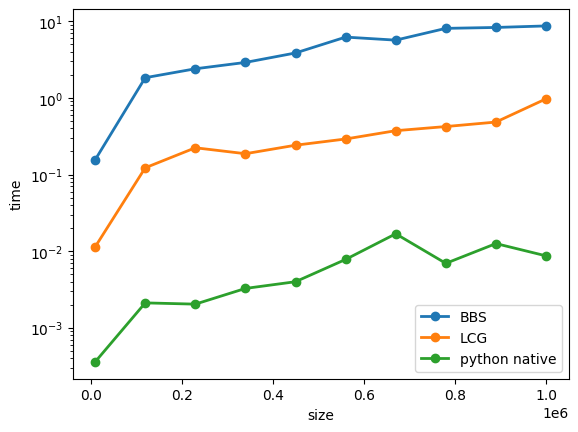

In [ ]:
plt.plot(sample_sizes, bbs_time, label='BBS', marker='o', linewidth=2)
plt.plot(sample_sizes, lcg_time, label='LCG', marker='o', linewidth=2)
plt.plot(sample_sizes, rnd_time, label='python native', marker='o', linewidth=2)

plt.xlabel("size")
plt.ylabel("time")
plt.yscale('log')

plt.legend()
plt.show()